In [ ]:
model = Sequential([
    LSTM(64, input_shape=(X_train_combined.shape[1], X_train_combined.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint('model.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
csv_logger = CSVLogger('training.log')

# Train the model
history = model.fit(X_train_combined, y_train_combined, validation_data=(X_val_combined, y_val_combined),
                    epochs=20, batch_size=32, callbacks=[checkpoint, csv_logger])


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 9000 and the array at index 1 has size 6000

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow as tf
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras import regularizers
# Load mutated sequences and non-mutated sequences
mutated_data = np.load("/content/MUTATION_DATA_TRAINING_6000.npz", allow_pickle=True)
nonmutated_data = np.load("/content/EAUGMENTED_DATA_TRAINING_6000.npz", allow_pickle=True)

# Load CSV with allele frequencies
def load_sequences(data):
    encoded_sequences = None
    for key in data.files:
        temp_sequences = data[key]
        if temp_sequences.ndim == 2:  # If 2D, reshape to 3D for LSTM
            temp_sequences = np.expand_dims(temp_sequences, axis=1)  # (samples, 1, features)
        if temp_sequences.ndim == 3:
            encoded_sequences = temp_sequences
            input_shape = input_shape=(encoded_sequences.shape[1], encoded_sequences.shape[2])
            break
    return encoded_sequences, input_shape

# Load mutated and non-mutated sequences
mutated_sequences, shape = load_sequences(mutated_data)
nonmutated_sequences, shape = load_sequences(nonmutated_data)

X_mutated, y_mutated = mutated_sequences, np.ones(mutated_sequences.shape[0])
X_nonmutated, y_nonmutated = nonmutated_sequences, np.zeros(nonmutated_sequences.shape[0])

# Ensure both classes have the same number of samples
min_samples = min(len(X_mutated), len(X_nonmutated))
X_mutated, y_mutated = X_mutated[:min_samples], y_mutated[:min_samples]
X_nonmutated, y_nonmutated = X_nonmutated[:min_samples], y_nonmutated[:min_samples]

# Concatenate both classes
X = np.concatenate([X_mutated, X_nonmutated], axis=0)
y = np.concatenate([y_mutated, y_nonmutated], axis=0)

# First split: Training (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, shuffle = True)


# Step 2: Combine mutated and non-mutated data for training and testing



In [ ]:
checkpoint_path = "E:/my_models/750_if_new_best_model.weights.h5"

In [47]:
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, BatchNormalization

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9417 - loss: 0.9084
Epoch 1: val_loss improved from inf to 0.93284, saving model to E:/my_models/6000_if_new_best_model.weights.h5
300/300 ━━━━━━━━━━━━━━━━━━━━ 426s 1s/step - accuracy: 0.9418 - loss: 0.9082 - val_accuracy: 1.0000 - val_loss: 0.9328
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       885
         1.0       1.00      0.99      1.00       915

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

ROC-AUC: 0.9990738168009633


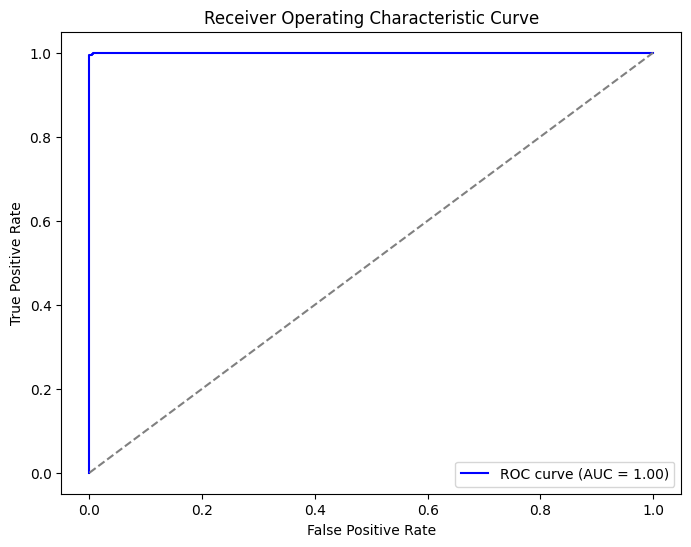

57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step - accuracy: 0.9970 - loss: 0.9483
Test Accuracy: 0.9972
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step

🔹 First 10 Predictions vs Actual Values 🔹
Sample 1: Actual = 0.0, Predicted Probability = 0.1293
Sample 2: Actual = 0.0, Predicted Probability = 0.1740
Sample 3: Actual = 0.0, Predicted Probability = 0.1523
Sample 4: Actual = 1.0, Predicted Probability = 0.5252
Sample 5: Actual = 0.0, Predicted Probability = 0.1352
Sample 6: Actual = 1.0, Predicted Probability = 0.5252
Sample 7: Actual = 1.0, Predicted Probability = 0.5252
Sample 8: Actual = 0.0, Predicted Probability = 0.1358
Sample 9: Actual = 0.0, Predicted Probability = 0.1429
Sample 10: Actual = 0.0, Predicted Probability = 0.1403


In [48]:
def rnn_model(input_shape):
    model = Sequential([

        # First LSTM Layer
        LSTM(64, input_shape=input_shape, return_sequences=True, activation="relu",
             kernel_regularizer=regularizers.l2(0.001)),  # Reduced L2 regularization strength
        Dropout(0.3),  # Reduced dropout to 0.3 (instead of 0.4)

        # BatchNormalization to improve learning and reduce overfitting
        BatchNormalization(),

        # Second LSTM Layer
        LSTM(32, activation="relu", return_sequences=True,
             kernel_regularizer=regularizers.l2(0.001)),  # Reduced L2 regularization strength
        Dropout(0.3),  # Reduced dropout to 0.3

        # Third LSTM Layer
        LSTM(16, activation="relu", return_sequences=False,
             kernel_regularizer=regularizers.l2(0.001)),  # Reduced L2 regularization strength
        Dropout(0.3),  # Further reduced dropout to 0.2

        # Dense Layer with fewer units
        Dense(8, activation="relu", kernel_regularizer=regularizers.l2(0.001)),  # Smaller dense layer

        # Output Layer
        Dense(1, activation="sigmoid", kernel_regularizer=regularizers.l2(0.001))  # Output layer with L2
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Train the model
checkpoint_path = "E:/my_models/6000_if_new_best_model.weights.h5"
model1 = rnn_model(shape)
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, save_weights_only=True, verbose=1)
csv_logger = CSVLogger("training_log_6000_1.csv")

history = model1.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=1, batch_size=32, callbacks=[checkpoint, csv_logger])


# Evaluate the model
y_pred = model1.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Evaluate model performance
print(classification_report(y_test, y_pred_classes))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

# Test Accuracy
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
predictions = model.predict(X_test).flatten()
print("\n🔹 First 10 Predictions vs Actual Values 🔹")
for i in range(10):
    print(f"Sample {i+1}: Actual = {y_test[i]}, Predicted Probability = {predictions[i]:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       960
         1.0       1.00      0.99      0.99       960

    accuracy                           0.99      1920
   macro avg       0.99      0.99      0.99      1920
weighted avg       0.99      0.99      0.99      1920

ROC-AUC: 0.9957921006944443


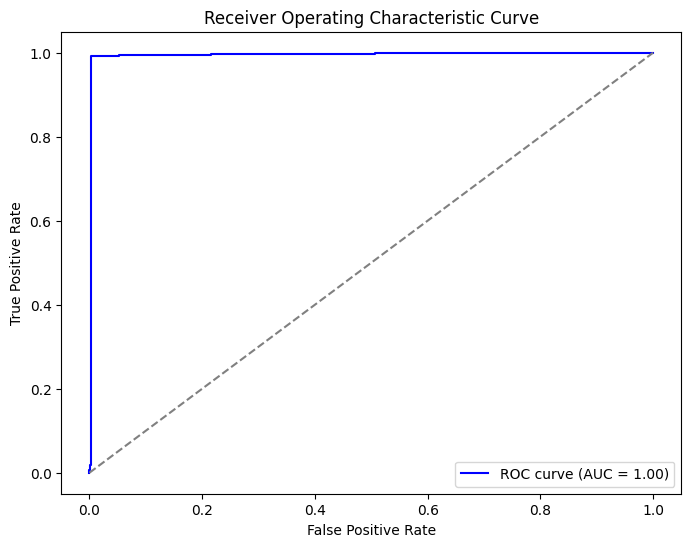

60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.9940 - loss: 2.9406
Test Accuracy: 0.9948
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step

🔹 First 10 Predictions vs Actual Values 🔹
Sample 1: Actual = 0.0, Predicted Probability = 0.1477
Sample 2: Actual = 1.0, Predicted Probability = 0.5252
Sample 3: Actual = 0.0, Predicted Probability = 0.1689
Sample 4: Actual = 1.0, Predicted Probability = 0.5252
Sample 5: Actual = 1.0, Predicted Probability = 0.5252
Sample 6: Actual = 1.0, Predicted Probability = 0.5252
Sample 7: Actual = 0.0, Predicted Probability = 0.1281
Sample 8: Actual = 1.0, Predicted Probability = 0.5252
Sample 9: Actual = 1.0, Predicted Probability = 0.5252
Sample 10: Actual = 1.0, Predicted Probability = 0.5252


In [37]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Evaluate model performance
print(classification_report(y_test, y_pred_classes))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

# Test Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
predictions = model.predict(X_test).flatten()
print("\n🔹 First 10 Predictions vs Actual Values 🔹")
for i in range(10):
    print(f"Sample {i+1}: Actual = {y_test[i]}, Predicted Probability = {predictions[i]:.4f}")

In [39]:
import shap
explainer = shap.Explainer(model, X_train)
explainer = shap.GradientExplainer(model, X_train_combined[:100])
# Calculate SHAP values for the input data
shap_values = explainer(X_train)






KeyboardInterrupt: 

In [ ]:
shap.summary_plot(shap_values, input_data)

In [ ]:
shap.initjs()  # Initialize JavaScript visualization
shap.force_plot(shap_values[0], input_data[0]

In [ ]:
shap.dependence_plot("feature_name", shap_values, input_data)

In [ ]:
shap.waterfall_plot(shap_values[0])